<a href="https://colab.research.google.com/github/Bady9898/Decision-Tree-Random-Forest/blob/main/Fraud_check_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bagging decision trees for classification [KFold]
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
filename = 'Fraud_check.csv'
names = ['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
df = read_csv(filename)

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [23]:
#label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# encode variables with ordinal encoding
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [11]:
df.loc[df["Taxable.Income"] <=30000,"status"]="Risky"        
df.loc[df["Taxable.Income"] >=30000,"status"]="Good"
df.head(20)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [12]:
label_encoder = preprocessing.LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [13]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


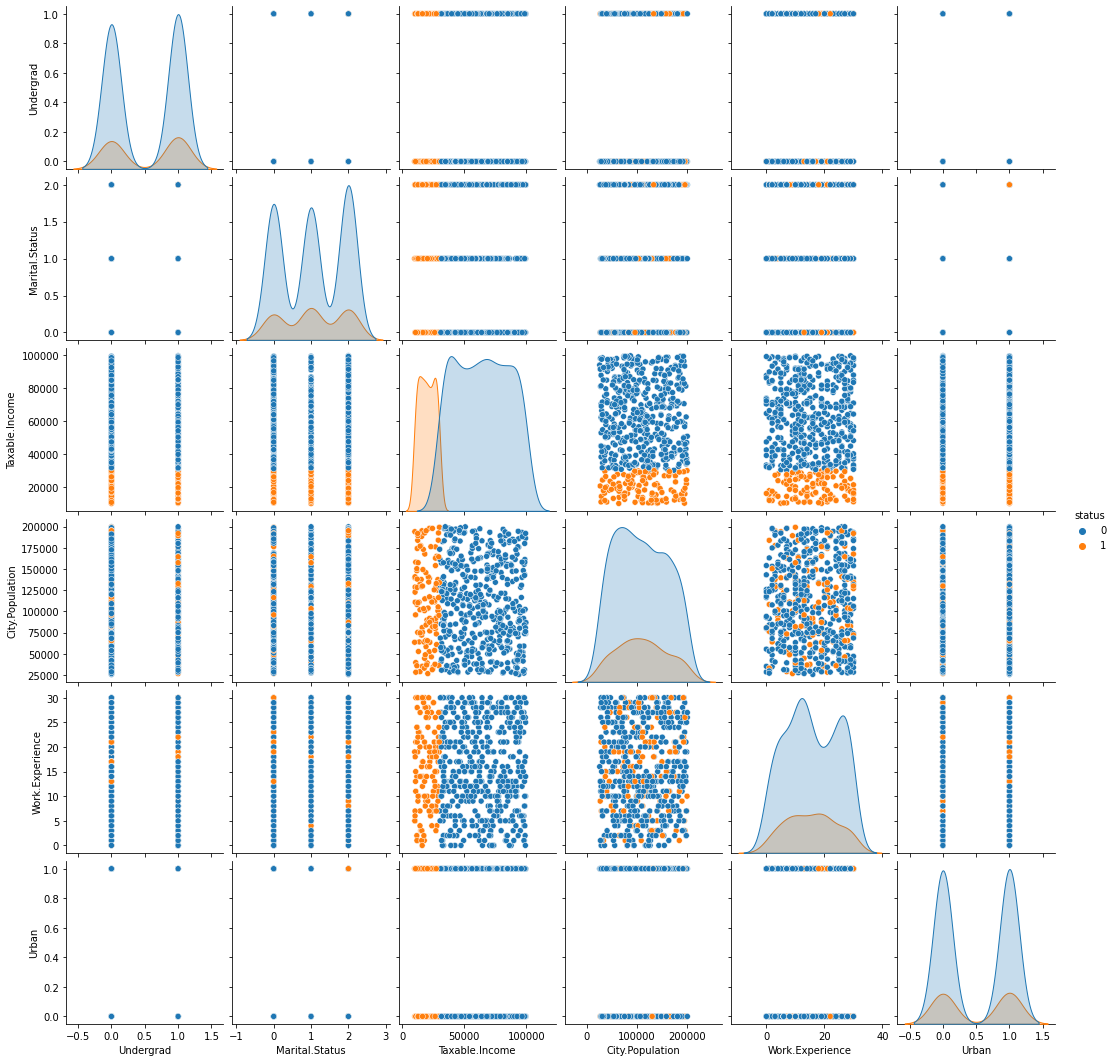

In [14]:
import seaborn as sns

sns.pairplot(df,hue="status")

In [15]:
# Splitting The Data in Train and Test 
x = df.drop(['status', 'Taxable.Income'],axis=1)
y = df['status']

In [16]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier
## Random forest Classification
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10,  shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_rfc = cross_val_score(model, x, y, cv=kfold)
print(results_rfc.mean())

0.7300000000000001


In [19]:
# Bagging 
from sklearn.ensemble import BaggingClassifier

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bag = cross_val_score(model, x, y, cv=kfold)
print(results_bag.mean())

0.7433333333333333


In [20]:
# Boosting 
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model, x, y, cv=kfold)
print(results_boost.mean())

0.7766666666666666


In [21]:
# Stacking 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [22]:
# Creating the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# Creating the ensemble model
ensemble = VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, x, y, cv=kfold)
print(results_stack.mean())

0.7933333333333332


Ensemble model technique gives the Highest Accuracy of 0.793